Name: Erick Correia Silva

Dataframe: bank-additional

Date: 07/09/2021


In [5]:
#import das bibliotecas

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#metricas
from yellowbrick.classifier import ConfusionMatrix
from sklearn import metrics
from sklearn.metrics import f1_score
#graficos
import seaborn as sns



##Pre processamento dos dados


(instanciando o datset ,verificando se a dados faltantes, dividindo os dados de amostra e classe, transformando os dados categorios em dados numericos, balanceando os dados da classe ) 

In [6]:
#abrindo dataset
data = pd.read_csv("/content/drive/MyDrive/ML atividades /Dadasets/bank/bank-additional-full.csv", sep =";")
print(data.shape)
#pre visualizaçao do dataset
data.head(100)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,221,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,426,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,287,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,197,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#informaçoes sobre os dados
print(data.info())
print("\n ##########################################\n")
#verificando de a dados faltantes
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Tratando os dados Unknown

In [8]:
index_names = data[ (data['age'] == 'unknown')
                | (data['job'] == 'unknown')
                |(data['marital'] == 'unknown')
                |(data['education'] == 'unknown')
                |(data['default'] == 'unknown')
                |(data['housing'] == 'unknown')
                |(data['loan'] == 'unknown')
                |(data['contact'] == 'unknown')
                |(data['month'] == 'unknown')
                |(data['day_of_week'] == 'unknown')
                |(data['duration'] == 'unknown')
                |(data['campaign'] == 'unknown')
                |(data['pdays'] == 'unknown')
                |(data['previous'] == 'unknown')
                |(data['poutcome'] == 'unknown')
                |(data['emp.var.rate'] == 'unknown')
                |(data['cons.price.idx'] == 'unknown')
                |(data['cons.conf.idx'] == 'unknown')
                |(data['euribor3m'] == 'unknown')
                |(data['y'] == 'unknown')].index


data.drop(index_names, inplace=True)

no     26629
yes     3859
Name: y, dtype: int64

Depositos dentro do prazo 12.6574% do dataset.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


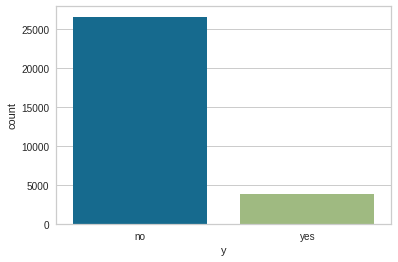

In [9]:
#verificação do balanceamento das classe 
print(data.y.value_counts())
print("\nDepositos dentro do prazo {:.4f}% do dataset.\n".format((data[data.y == 'yes'].shape[0] / data.shape[0]) * 100))
 
# plotar gráfico de barras para as Classes
sns.countplot('y', data=data);


#Transformando dados categoricos em numericos

Transformando a coluna y (classe) em numerica

In [10]:
y_map = {"no": 0, "yes": 1}
data['y'].replace(y_map, inplace= True)

Transformando a coluna job para numerica 

In [11]:
job_map = {"admin.": 0, "blue-collar": 1, "technician": 2, "services": 3, "management": 4,"retired": 5, 
           "self-employed": 6, "entrepreneur": 7, "unemployed": 8, "housemaid": 9, "student": 10}

data['job'].replace(job_map, inplace= True)

Transformando a coluna marital em numerica

In [12]:
marital_map = {"married": 0, "single": 1, "divorced": 2}
data['marital'].replace(marital_map, inplace= True)

Transformando a coluna education em numerica

In [13]:
education_map = {"illiterate": 0, "basic.6y": 1, "basic.4y": 2, "basic.9y": 3, 
                 "professional.course": 4, "high.school": 5, "university.degree": 6}

data['education'].replace(education_map, inplace= True)

Transformando a coluna defaul em numerica

In [14]:
default_map = {"no": 0, "yes": 1}
                 
data['default'].replace(default_map, inplace= True)

Transformando a coluna housing em numerica

In [15]:
housing_map = {"no": 0, "yes": 1}
                 
data['housing'].replace(housing_map, inplace= True)

Transformando a coluna loan em numerica

In [16]:
loan_map = {"no": 0, "yes": 1}
                 
data['loan'].replace(loan_map, inplace= True)

Transformando a coluna contact em numerica

In [17]:
contact_map = {"cellular": 0, "telephone": 1}

data['contact'].replace(contact_map, inplace= True)

Transformando a coluna month em numerica 

In [18]:
month_map = {"mar": 0, "apr": 1, "may": 2, "jun": 3, "jul": 4, "aug": 5, "sep": 6, "oct": 7, "nov": 8, "dec": 9}

data['month'].replace(month_map, inplace= True)

Transformando a coluna day_of_week em numerica

In [19]:
day_of_week_map = {"mon": 0, "tue": 1, "wed": 2, "thu":3 ,"fri": 4}

data['day_of_week'].replace(day_of_week_map, inplace= True)

Transformando a coluna poutcome em numerica 

In [20]:
poutcome_map = {"nonexistent": 0, "failure": 1, "success": 2}

data['poutcome'].replace(poutcome_map, inplace= True)

In [21]:
#new dataset
print(data.info())

data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  int64  
 2   marital         30488 non-null  int64  
 3   education       30488 non-null  int64  
 4   default         30488 non-null  int64  
 5   housing         30488 non-null  int64  
 6   loan            30488 non-null  int64  
 7   contact         30488 non-null  int64  
 8   month           30488 non-null  int64  
 9   day_of_week     30488 non-null  int64  
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  int64  
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,0,2,0,0,0,1,2,0,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,5,0,1,0,1,2,0,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,1,0,0,0,1,2,0,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,0,5,0,0,1,1,2,0,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,0,4,0,0,0,1,2,0,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,0,8,4,334,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,0,4,0,0,0,0,8,4,383,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,6,0,1,0,0,8,4,189,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,2,0,4,0,0,0,0,8,4,442,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [22]:
#separando as amostras da classe do dataset
X = data.iloc[:,:20].values 
y = data.iloc[:,20].values


##Medindo o melhor algoritmo para treinamento usando validação cruzada k-fold 

 Algoritmos utilizados (kNN, SVM, Árvore de Decisão, Random Forest, Gradient Boosting e Redes Neurais)

In [23]:
Colunas_result = [
    'algoritmo',
    'parametros',
    'F1_score', 
]

dataframe_grid = pd.DataFrame(columns= Colunas_result) #dataframe para guarda os valores dos grids


#instanciando o 5-fold's
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


##Pipeline e Gridsearch KNN

In [24]:
#criando o pipeline para KNN
model_knn = Pipeline(steps=[('scaler_normalize', preprocessing.MinMaxScaler()),
                        ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', KNeighborsClassifier())
])

model_knn.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'scaler_normalize', 'std_scaler', 'classifier', 'scaler_normalize__copy', 'scaler_normalize__feature_range', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])

In [25]:
#paramentros do knn para gridsearch
parameters_knn = {'classifier__n_neighbors': [1,3,5,7], 
                  'classifier__algorithm': ['auto' , 'ball_tree', 'kd_tree', 'brute'],
                  'classifier__weights': ['uniform' , 'distance'],
                  'classifier__metric': ['euclidean' , 'manhattan']}

#instanciando o gridsearch
grid = GridSearchCV(model_knn, param_grid= parameters_knn ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Pipeline(memory=None,
         steps=[('scaler_normalize',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='euclidean', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='distance'))],
         verbose=False)
0.4876165010783334


In [26]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'KNN' ,grid.best_params_ ,grid.best_score_

dataframe_grid

,algoritmo,parametros,F1_score
0,KNN,"{'classifier__algorithm': 'auto', 'classifier_...",0.487617


##Pipeline e Gridsearch SVM




In [27]:
#criando o pipeline para SVM
model_svm = Pipeline(steps=[('scaler_normalize', preprocessing.MinMaxScaler()), 
                       ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', svm.SVC(random_state=42))
])

model_svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_normalize', 'std_scaler', 'classifier', 'scaler_normalize__copy', 'scaler_normalize__feature_range', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'classifier__C', 'classifier__break_ties', 'classifier__cache_size', 'classifier__class_weight', 'classifier__coef0', 'classifier__decision_function_shape', 'classifier__degree', 'classifier__gamma', 'classifier__kernel', 'classifier__max_iter', 'classifier__probability', 'classifier__random_state', 'classifier__shrinking', 'classifier__tol', 'classifier__verbose'])

In [ ]:
#paramentros do svm para gridsearch
parameters_svm = {            
             'classifier__C': np.logspace(0,4,10),
             'classifier__kernel': ['rbf'],
             'classifier__gamma': ['scale', 'auto'],
             'classifier__max_iter': [-1,10,100]}

#instanciando o gridsearch
grid = GridSearchCV(model_svm, param_grid= parameters_svm ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)

In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'SVM' ,grid.best_params_ ,grid.best_score_

dataframe_grid

##Pipeline e Gridseach Árvore de Decisão



In [ ]:
#criando o pipeline para decisiontree
model_decisiontree = Pipeline(steps=[('scaler_normalize', preprocessing.MinMaxScaler()), 
                       ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', DecisionTreeClassifier())
])

model_decisiontree.get_params().keys()

In [ ]:
#paramentros do grid para decisiontree
parameters_decisiontree = {     
             'classifier__criterion' : ['gini', 'entropy'],
             'classifier__max_depth' : [2,4,6,8,10,12]
             }

#instanciando o gridsearch
grid = GridSearchCV(model_decisiontree, param_grid= parameters_decisiontree ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)

In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'Arvore de decisão' ,grid.best_params_ ,grid.best_score_

dataframe_grid

##Pipeline e Gridseach Random Forest


In [ ]:
#criando o pipeline para Random forest
model_rf = Pipeline(steps=[('scaler_normalize', preprocessing.MinMaxScaler()), 
                       ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', RandomForestClassifier(random_state=42))
])

model_rf.get_params().keys()

In [ ]:
#parametros para grid_seach Random forest
parameters_rf = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']
}

grid = GridSearchCV(model_rf, param_grid= parameters_rf ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)

In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'Random forest' ,grid.best_params_ ,grid.best_score_

dataframe_grid

##Pipeline e Gridseach Gradient Boosting





In [ ]:
#criando o pipeline para Gradient Boosting
model_GB = Pipeline(steps=[('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', GradientBoostingClassifier())
])

model_GB.get_params().keys()

In [ ]:
model_GB =GradientBoostingClassifier()

#parametros para grid_seach gradient boosting
parameters_GB = {
    "learning_rate": [0.01, 0.025, 0.05],
    "max_depth":[3,4,5],
    "max_features":["log2"],
    "criterion": ["mae"],
    }

grid = GridSearchCV(model_GB, param_grid= parameters_GB ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)


In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'Gradient boosting' ,grid.best_params_ ,grid.best_score_

dataframe_grid

##Pipeline e Gridseach Rede Neural


In [ ]:
#criando o pipeline para Rede Neural
model_RN = Pipeline(steps=[ ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier',MLPClassifier())
])

model_RN.get_params().keys()

In [ ]:
model_RN = MLPClassifier()

parameters_RN = {
    'solver': ['lbfgs'],
    'max_iter': [500,1000],
    'alpha': 10.0 ** -np.arange(1, 7), #valores de alpha 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])
    'hidden_layer_sizes':np.arange(5, 9),
    'random_state':[3,4,5,6]
  }
  
grid = GridSearchCV(model_RN, param_grid= parameters_RN ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X,y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)


In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'Rede Neural' ,grid.best_params_ ,grid.best_score_

dataframe_grid

##Avaliando melhor modelo

In [ ]:
#encontrando o maior valor de F1 
result = dataframe_grid.loc[dataframe_grid['F1_score'].idxmax()]
print(result , "\n \n Lista de parametros")


result.parametros
